In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN

In [5]:
df.shape

(70213, 13)

In [6]:
df.isnull().sum()

id              0
Category        0
len             0
attr_1      18346
attr_2      15021
attr_3      15515
attr_4      10325
attr_5      13720
attr_6      32097
attr_7      28798
attr_8      32739
attr_9      36648
attr_10     45214
dtype: int64

# Task 1:  
1. Each basket is a <category, attribute> tuple.  You will create two tuples per category, so in 
total you should have 10 baskets
2.  Draw 100 sample  from each basket.

In [8]:
category_array = df.Category.unique()

In [10]:
tuple_pairs = [] 

### We can see that in 'Men tshirts' category, we can pick attr_1,attr_2 as they have fewer null values so that we can sample 100 points for each pair.

In [21]:
print(cat_array[0])
df[df.Category==cat_array[0]].isnull().sum()

Men Tshirts


id             0
Category       0
len            0
attr_1      1257
attr_2      1123
attr_3      1476
attr_4      1318
attr_5      1290
attr_6      7267
attr_7      7267
attr_8      7267
attr_9      7267
attr_10     7267
dtype: int64

In [141]:
tuple_pairs.append((cat_array[0],'attr_1'))
tuple_pairs.append((cat_array[0],'attr_2'))

### In 'Sarees' category we can pick attr_4,attr_10 as they have fewer null values so that we can sample 100 points for each pair.

In [241]:
print(cat_array[1])
df[df.Category==cat_array[1]].isnull().sum()

Sarees


id              0
Category        0
len             0
attr_1      10461
attr_2        667
attr_3       2485
attr_4        450
attr_5        697
attr_6      13336
attr_7       9450
attr_8       1881
attr_9       4043
attr_10       528
dtype: int64

In [143]:
tuple_pairs.append((cat_array[1],'attr_4'))
tuple_pairs.append((cat_array[1],'attr_10'))

### In 'Kurtis' we can select attr_8,attr_9.

In [30]:
print(cat_array[2])
df[df.Category==cat_array[2]].isnull().sum()

Kurtis


id             0
Category       0
len            0
attr_1       193
attr_2      3591
attr_3      3422
attr_4       391
attr_5      3556
attr_6      2974
attr_7      2979
attr_8       120
attr_9       131
attr_10     6822
dtype: int64

In [145]:
tuple_pairs.append((cat_array[2],'attr_8'))
tuple_pairs.append((cat_array[2],'attr_9'))

### In 'Women Tshirts' we can select attr_3,attr_5.

In [34]:
print(cat_array[3])
df[df.Category==cat_array[3]].isnull().sum()

Women Tshirts


id              0
Category        0
len             0
attr_1       1489
attr_2       3973
attr_3       2194
attr_4       2613
attr_5       1740
attr_6       2733
attr_7       3314
attr_8      18264
attr_9      18774
attr_10     18774
dtype: int64

In [147]:
tuple_pairs.append((cat_array[3],'attr_3'))
tuple_pairs.append((cat_array[3],'attr_5'))

### In 'Women tops&tunics' category we can select attr_6,attr_7.

In [38]:
print(cat_array[4])
df[df.Category==cat_array[4]].isnull().sum()

Women Tops & Tunics


id              0
Category        0
len             0
attr_1       4946
attr_2       5667
attr_3       5938
attr_4       5553
attr_5       6437
attr_6       5787
attr_7       5788
attr_8       5207
attr_9       6433
attr_10     11823
dtype: int64

In [149]:
tuple_pairs.append((cat_array[4],'attr_6'))
tuple_pairs.append((cat_array[4],'attr_7'))

### We have created a tuple pairs list which contain 10 tuple pairs of category and attributes

In [151]:
print(tuple_pairs)

[('Men Tshirts', 'attr_1'), ('Men Tshirts', 'attr_2'), ('Sarees', 'attr_4'), ('Sarees', 'attr_10'), ('Kurtis', 'attr_8'), ('Kurtis', 'attr_9'), ('Women Tshirts', 'attr_3'), ('Women Tshirts', 'attr_5'), ('Women Tops & Tunics', 'attr_6'), ('Women Tops & Tunics', 'attr_7')]


### 10 combinations 100 samples each as a dataframe

In [246]:
df_list = []
for cat,att in tuple_pairs:
    df1 = df[df.Category == cat]
    #print(df1.columns)
    df1 = df1[['id','Category',att]]
    df1 = df1[df1[att].notnull()].sample(n=100, random_state=42)
    df_list.append(df1)

In [248]:
len(df_list) # checking that is the 

10

In [250]:
for df in df_list:
    print(df['Category'].unique()[0],df.columns[2])

Men Tshirts attr_1
Men Tshirts attr_2
Sarees attr_4
Sarees attr_10
Kurtis attr_8
Kurtis attr_9
Women Tshirts attr_3
Women Tshirts attr_5
Women Tops & Tunics attr_6
Women Tops & Tunics attr_7


## Task 2: 

### Plotting the visualizations of Isomap and t-SNE with 2 components.

In [398]:
from sklearn.manifold import Isomap, TSNE
from matplotlib import offsetbox

def plot_components(data,images=None, method='Isomap'): #Function to plot the components of a dimensionality reduction method.
    data = np.array(data)
    cmap='gray'
    thumb_frac=0.05
    if method == 'Isomap':
        model = Isomap(n_components=2)
    elif method == 't-SNE':
        model = TSNE(n_components=2, random_state=42)

    ax = plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    # If images are provided, add them as annotations on the scatter plot
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            img = Image.fromarray(images[i])
            img.thumbnail((20, 20), Image.LANCZOS)
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(img, cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Preparing the data for the visualization tasks

In [418]:
import os
from PIL import Image
final_flattened_list = [] # contains the flattened feature vectors of the images.
final_img_list = [] #contains the original image data.
for df in df_list:
    temp_list = []
    category = df.Category.unique()[0]
    attribute = df.columns[2]
    for i,rows in df.iterrows():
        id = str(rows['id'])
        l = len(id)
        new_id = (6-l)*'0'+id
        path = os.path.join('train_images',new_id+'.jpg')
        img = Image.open(path)
        img = img.resize((128,128))
        img_arr = np.array(img)
        temp_list.append(img_arr)
    
    final_img_list.append(temp_list)
    img_list = np.stack(temp_list)
    img_flattened = [img.flatten() for img in img_list]
    final_flattened_list.append(img_flattened)

In [256]:
tuple_pairs

[('Men Tshirts', 'attr_1'),
 ('Men Tshirts', 'attr_2'),
 ('Sarees', 'attr_4'),
 ('Sarees', 'attr_10'),
 ('Kurtis', 'attr_8'),
 ('Kurtis', 'attr_9'),
 ('Women Tshirts', 'attr_3'),
 ('Women Tshirts', 'attr_5'),
 ('Women Tops & Tunics', 'attr_6'),
 ('Women Tops & Tunics', 'attr_7')]

### Plotting the new transformed components with Isomap of 10 category attribute pairs 

0 1 2 3 4 5 6 7 8 9 

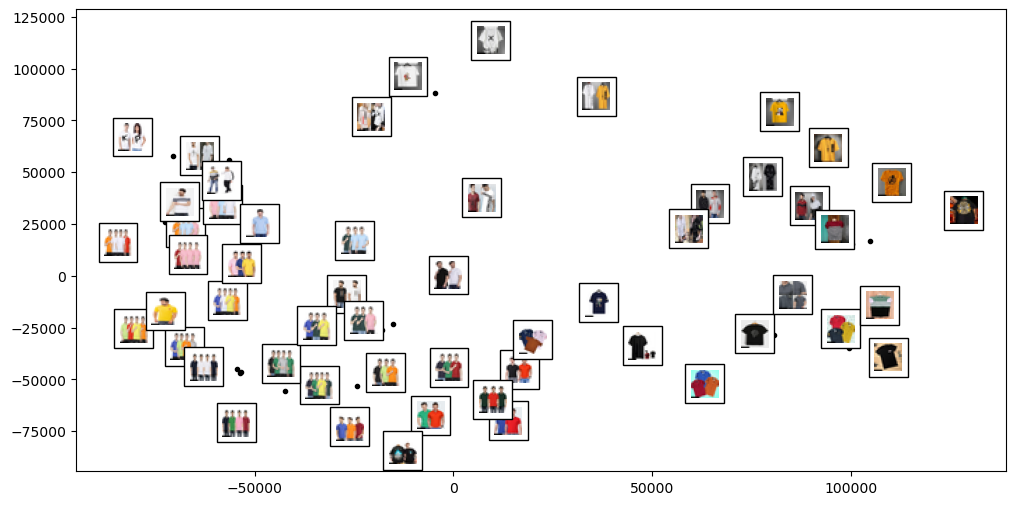

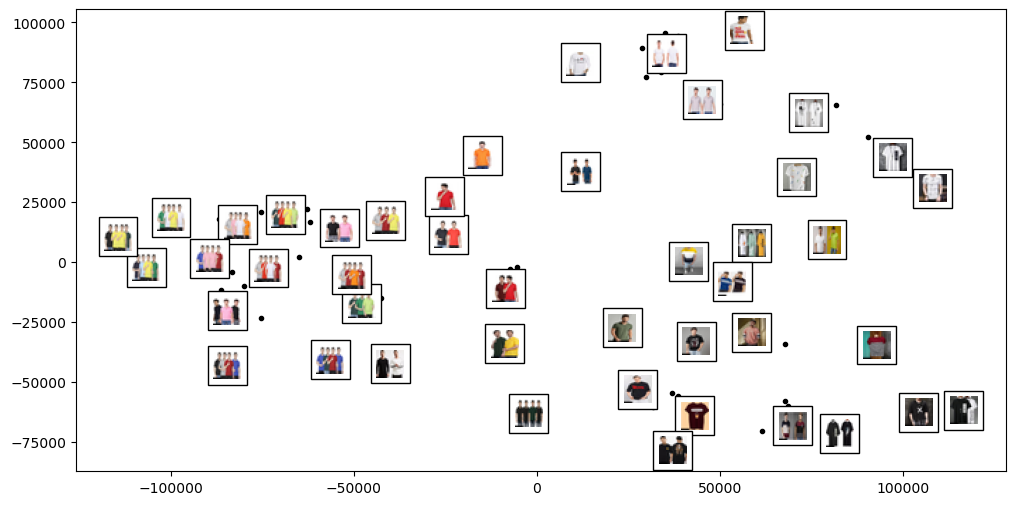

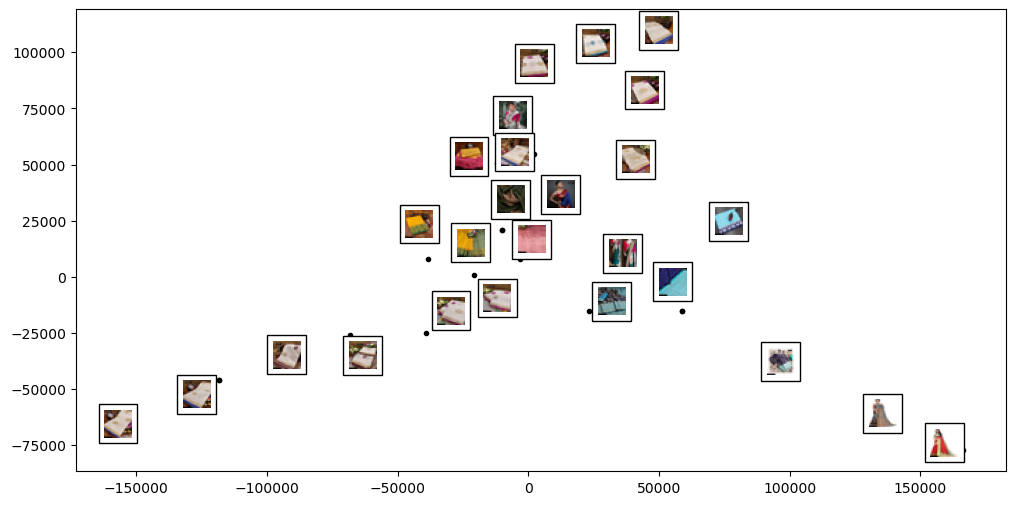

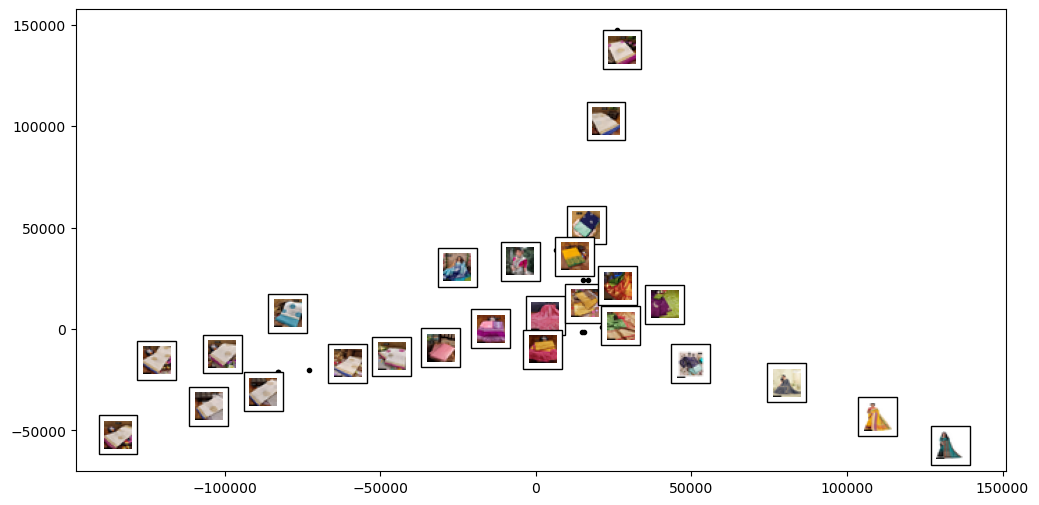

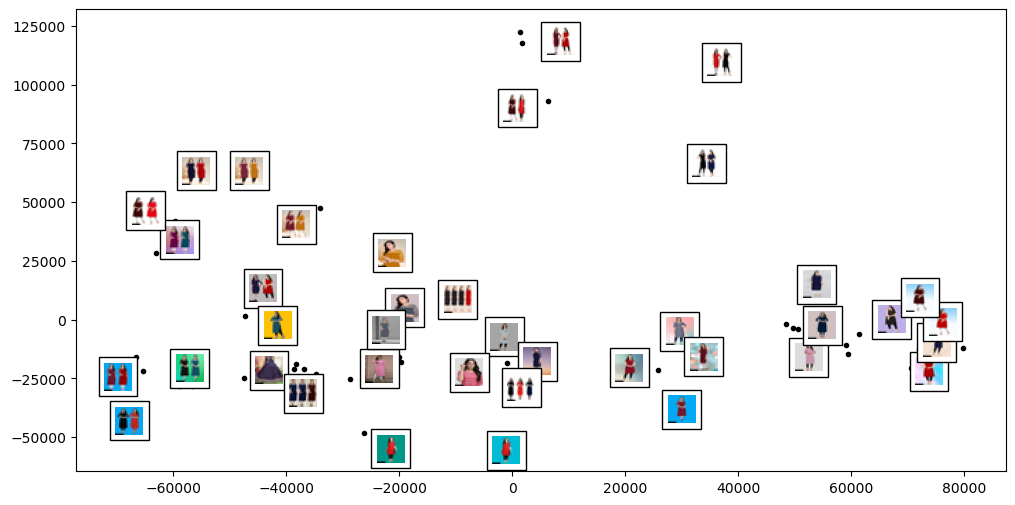

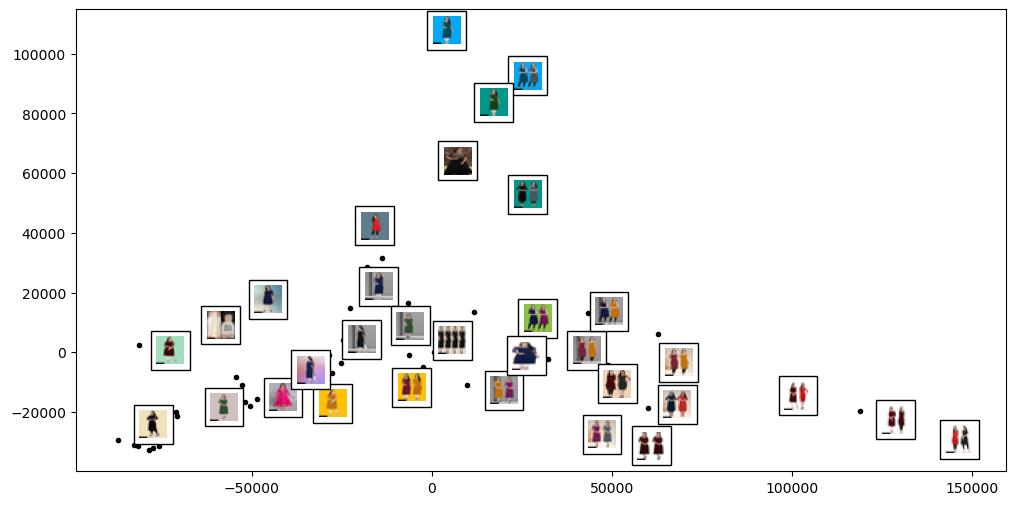

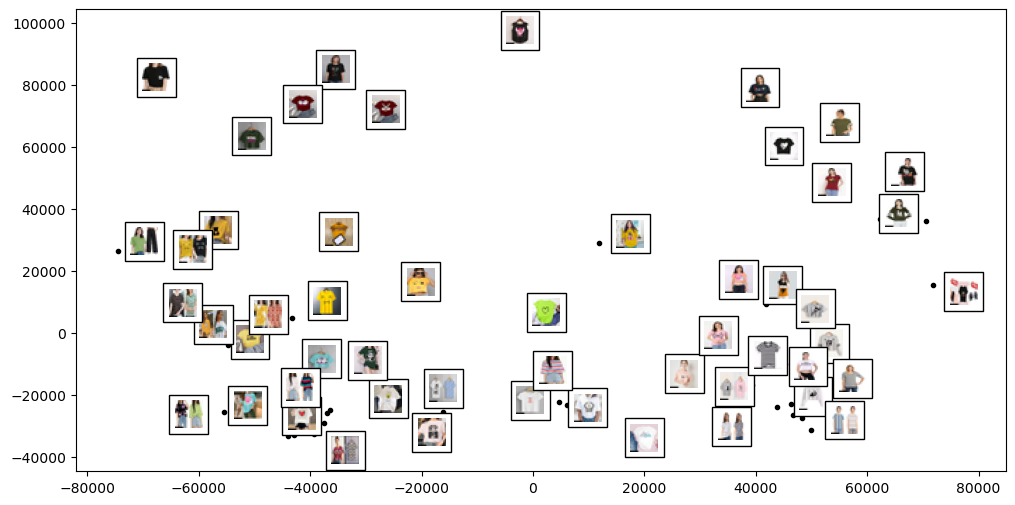

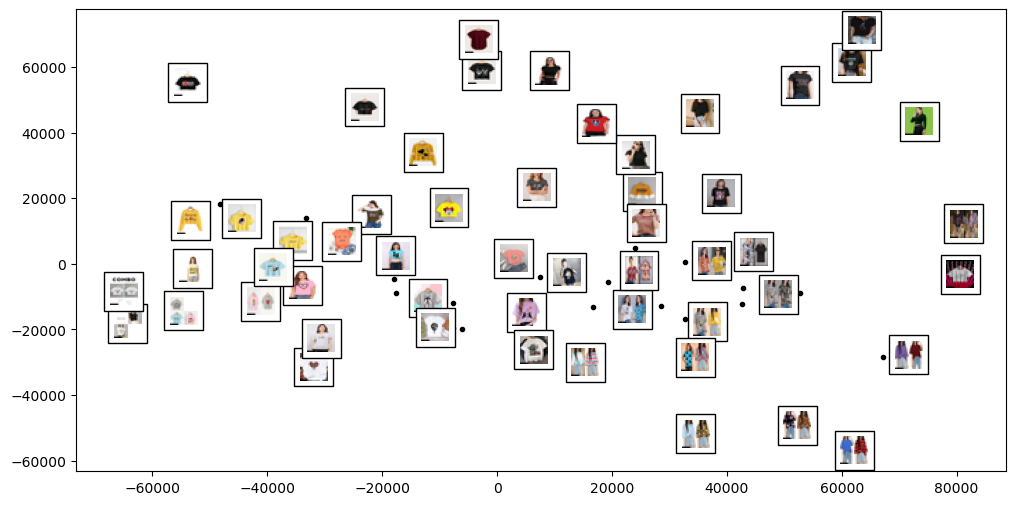

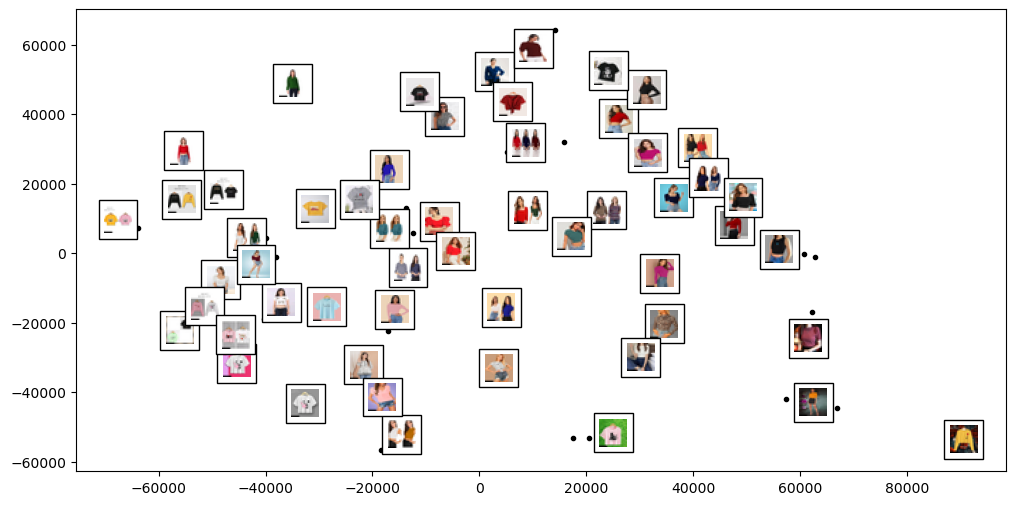

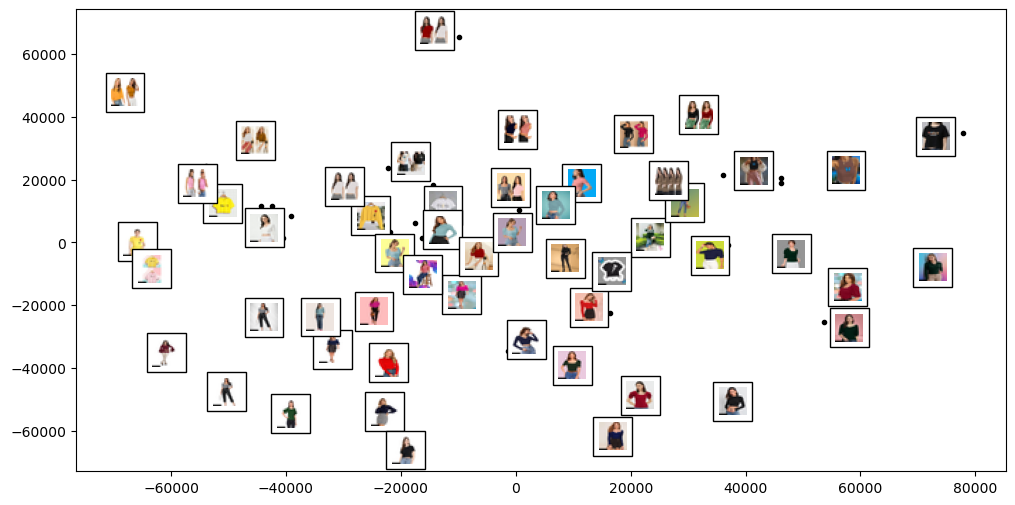

In [414]:
for i in range(10):
    print(i,end=" ")
    lst = final_flattened_list[i]
    images = final_img_list[i]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_components(lst,images,method='Isomap')

### Plotting the new transformed components with t-SNE of 10 category attribute pairs 

0 1 2 3 4 5 6 7 8 9 

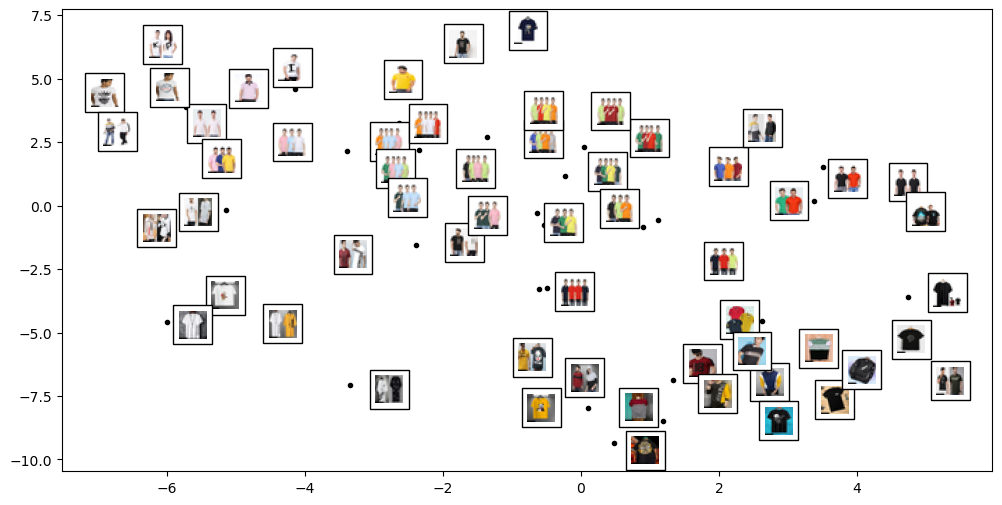

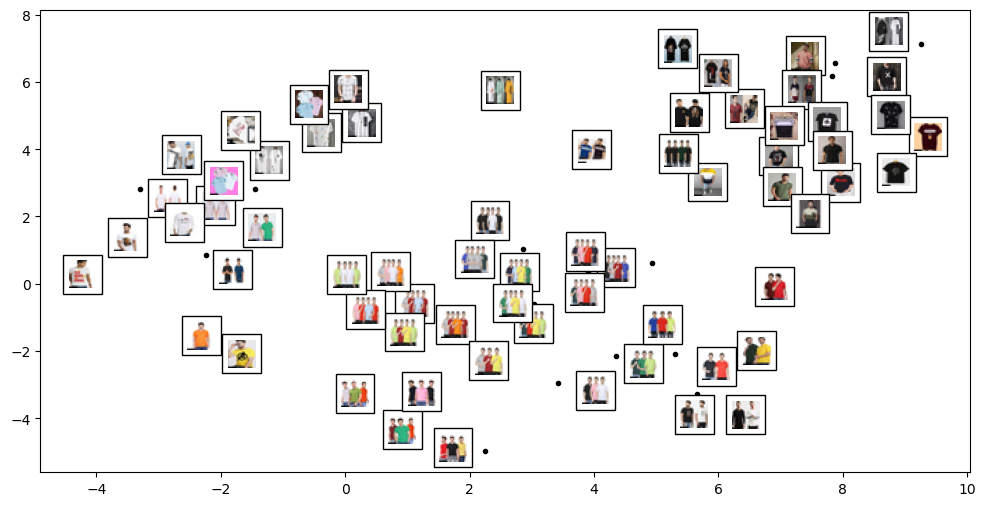

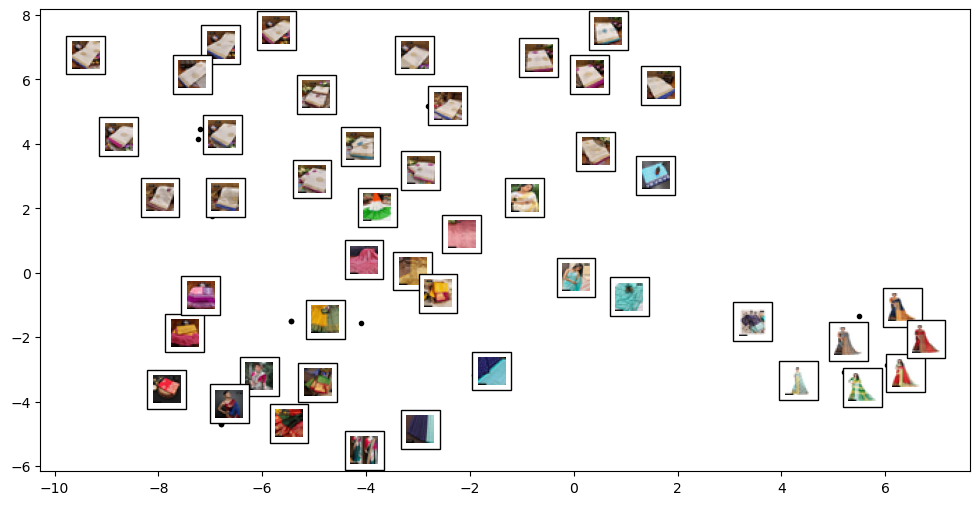

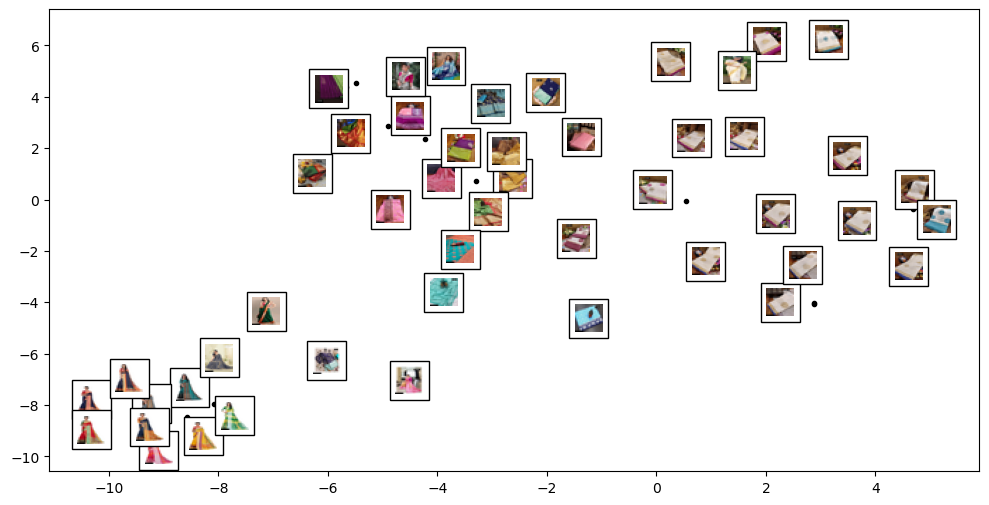

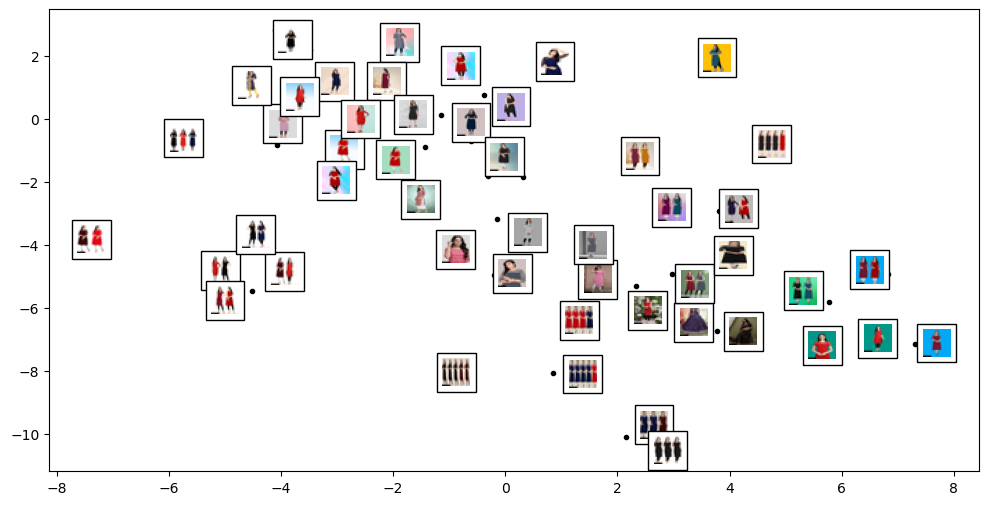

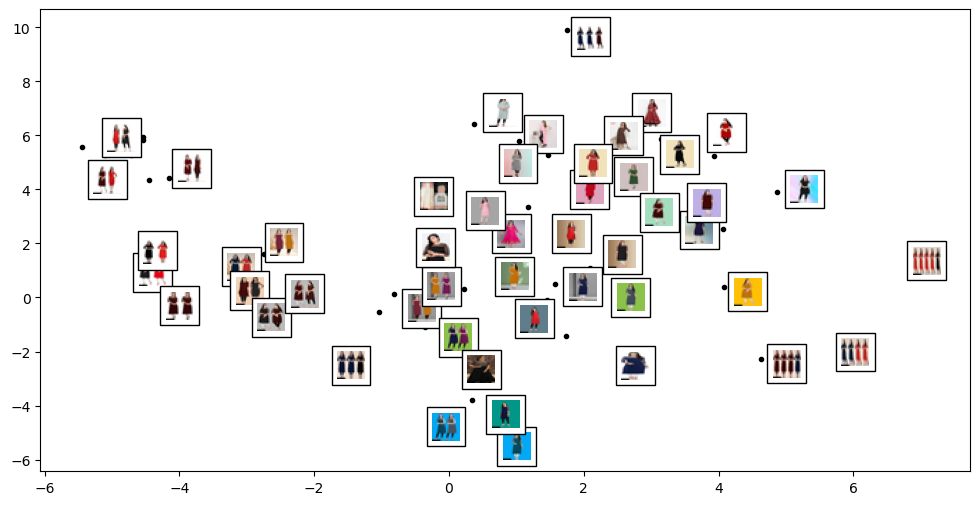

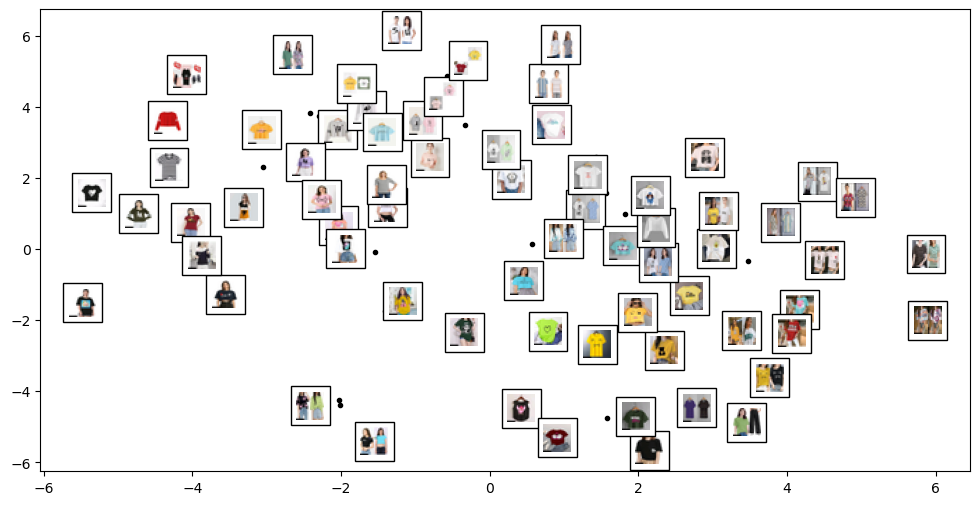

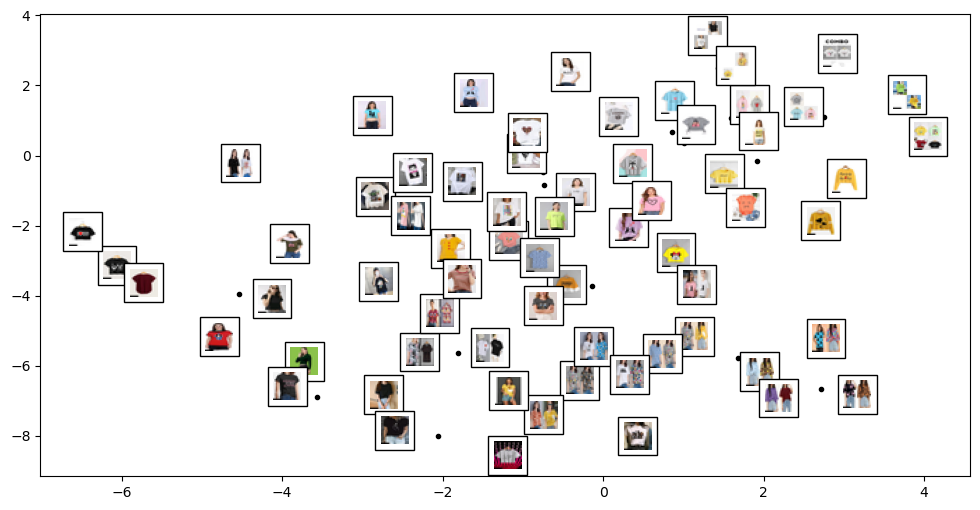

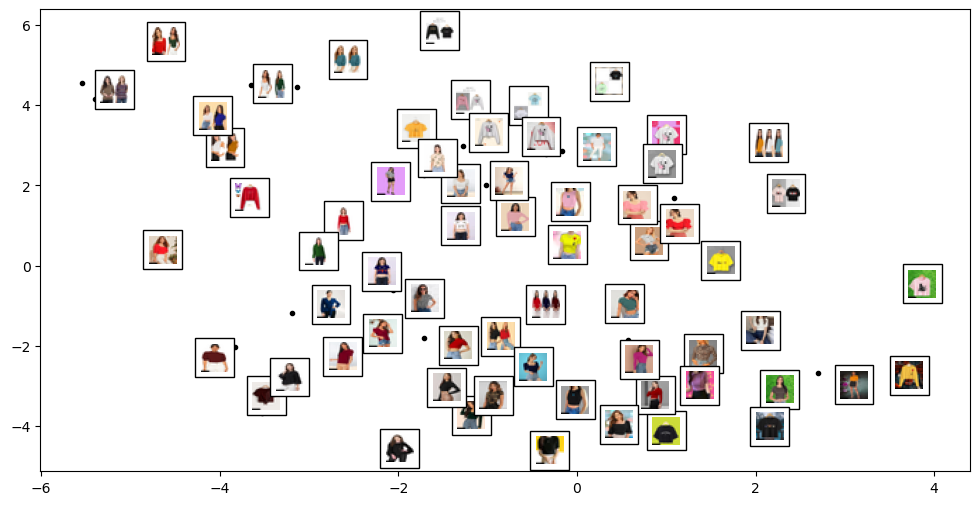

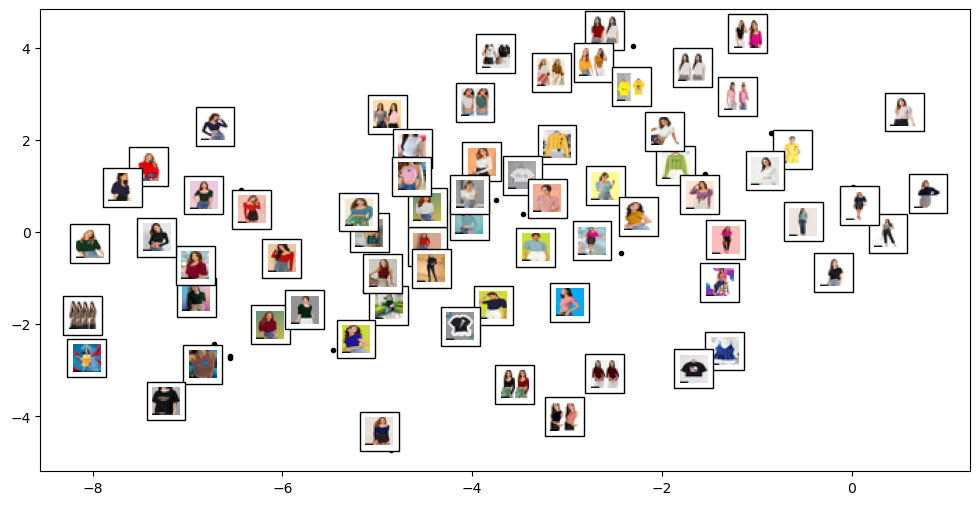

In [404]:
for i in range(10):
    print(i,end=" ")
    lst = final_flattened_list[i]
    images = final_img_list[i]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_components(lst,images,method='t-SNE')

## Task 3: 
## Identifying the patterns and naming the components discovered by the manifold learning methods

## 1. Identifying components of Isomaps

### For "Men T-shirts" category with attr_1
#### 1. Here the component-1 seems to be the color of the image gradually going from white to black which can be observed in the plot
#### 2. The component-2 seems to be color of t-shirts in the images gradually going from darker colors to lighter colors which can be observed in the plot

['multicolor' 'default' 'black' 'white']


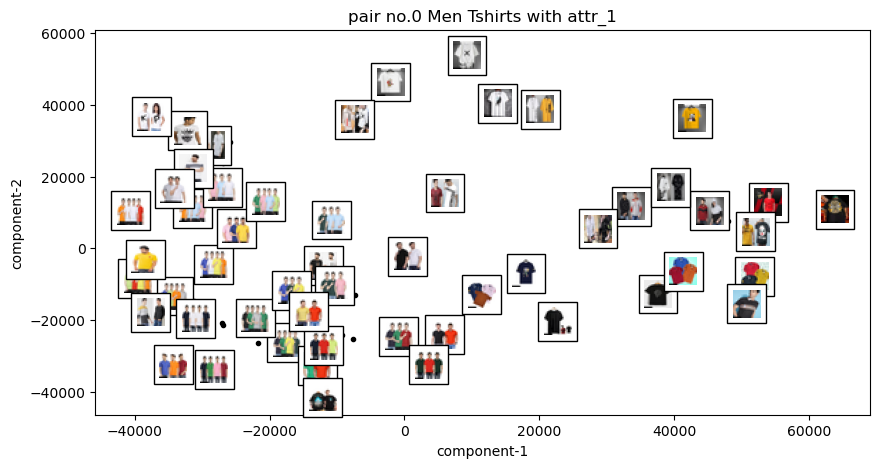

In [559]:
i=0
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Men T-shirts" category with attr_2
#### 1. Here the component-1 seems to be the type of collar of the image going from polo to round-neck from left to right which can be observed in the plot
#### 2. The component-2 seems to be color of t-shirts in the images gradually going from darker colors to lighter colors from bottom to top which can be observed in the plot

['polo' 'round']


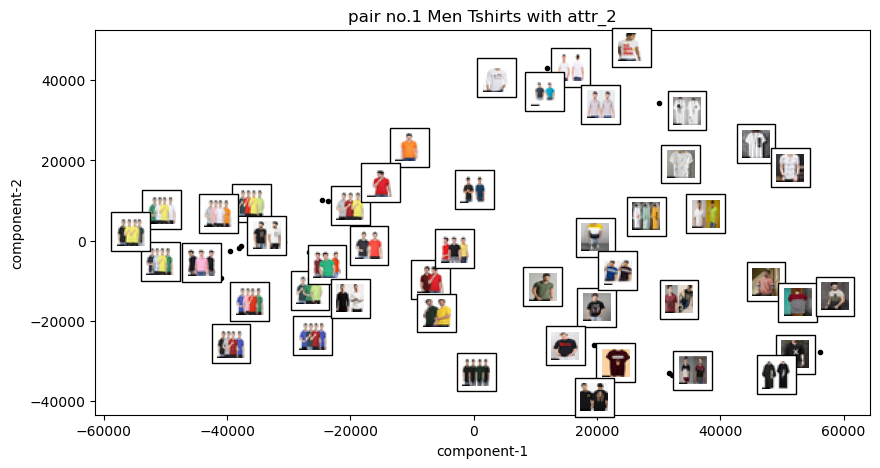

In [561]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Sarees" category with attr_4
#### 1. Here the component-1 seems to be the orientation of the image gradually going from more angled to less angled from left to right which can be observed in the plot
#### 2.  No visible pattern can be oberved along component-2

['multicolor' 'white' 'cream' 'default' 'pink' 'yellow' 'navy blue']


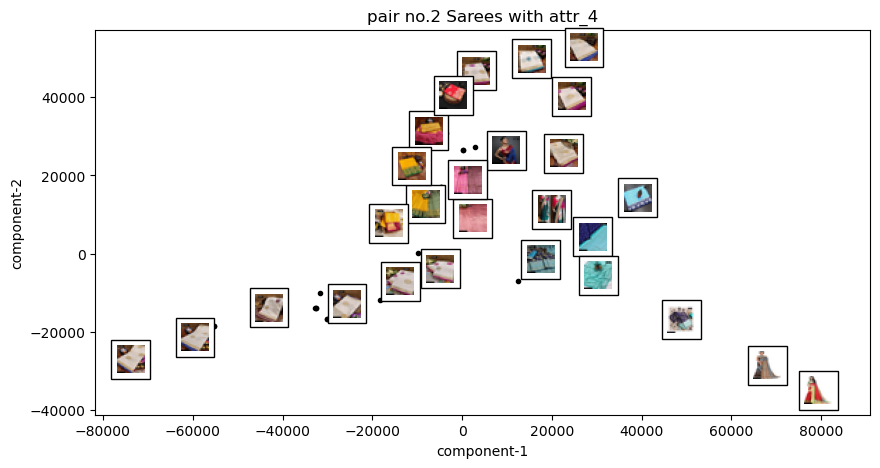

In [563]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Sarees" category with attr_10
#### 1.  Here the component-1 seems to be the extent of print on the saree gradually going from more print to less print from left to right which can be observed in the plot
#### 2.  The component-2 seems to be presence of human in the images going from human present to human absent from bottom to top which can be observed in the plot but not clearly 

['no' 'yes']


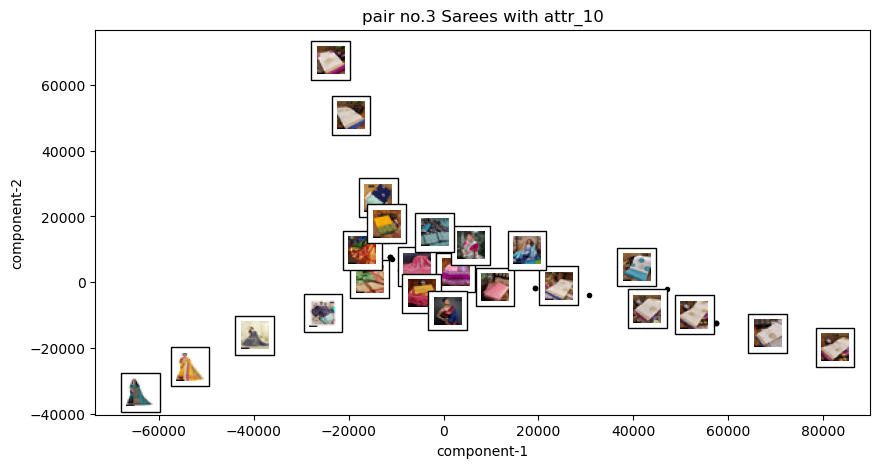

In [565]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Kurtis" category with attr_8
#### 1.  No visible pattern can be oberved along component-1
#### 2. The component-2 seems to be color of the background in the images going from colorful background to whitish background from bottom to top which can be observed in the plot

['three-quarter sleeves' 'sleeveless' 'short sleeves']


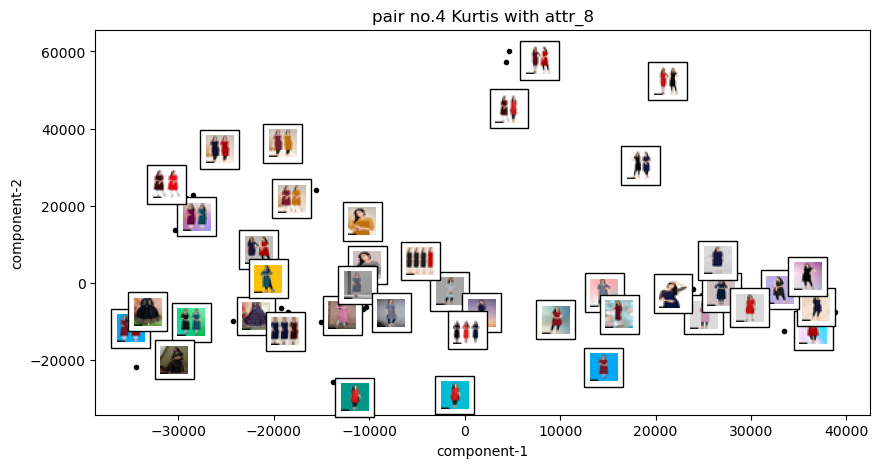

In [567]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Kurtis" category with attr_9
#### 1.  No visible pattern can be oberved along component-1
#### 2.  The component-2 seems to be color of the background in the images going from whitish background to colorful background from bottom to top which can be observed in the plot(reverse from the above plot)

['regular' 'sleeveless']


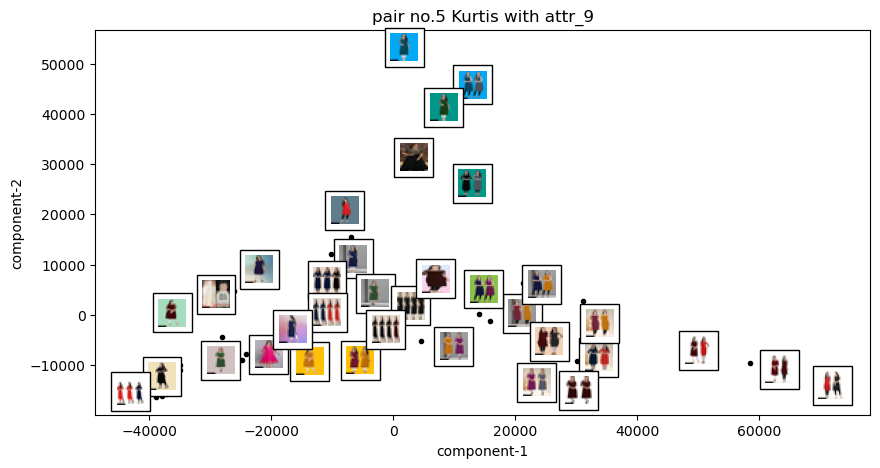

In [571]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Women Tshirts" category with attr_3
#### 1.  The component-1 seems to be the length of the tshirt going from crop top length to long length from left to right
#### 2.  The component-2 seems to be color of the tshirts in the images going from light color to dark color from bottom to top which can be observed in the plot

['regular' 'crop' 'long']


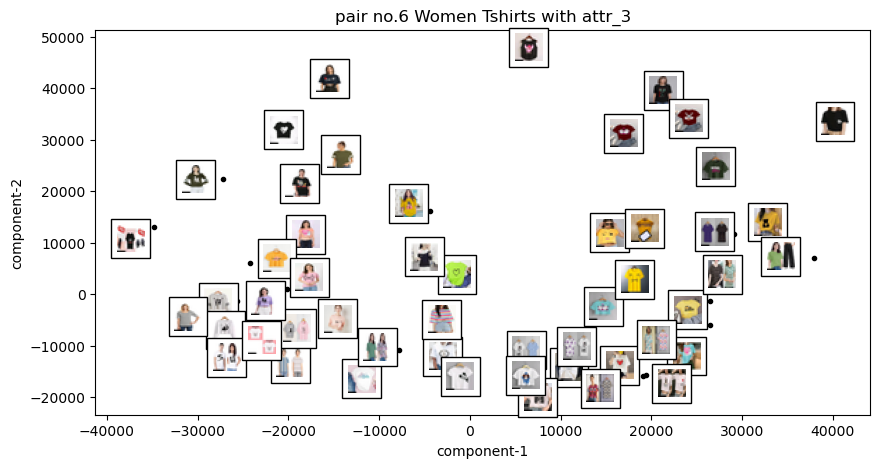

In [573]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Women Tshirts" category with attr_5
#### 1.The component-1 seems to be the type of print on the tshirt going from funky prints to textured prints from left to right
#### 2. The component-2 seems to be color of the tshirts in the images going from light color to dark color from bottom to top which can be observed in the plot

['solid' 'graphic' 'quirky' 'typography' 'default' 'funky print']


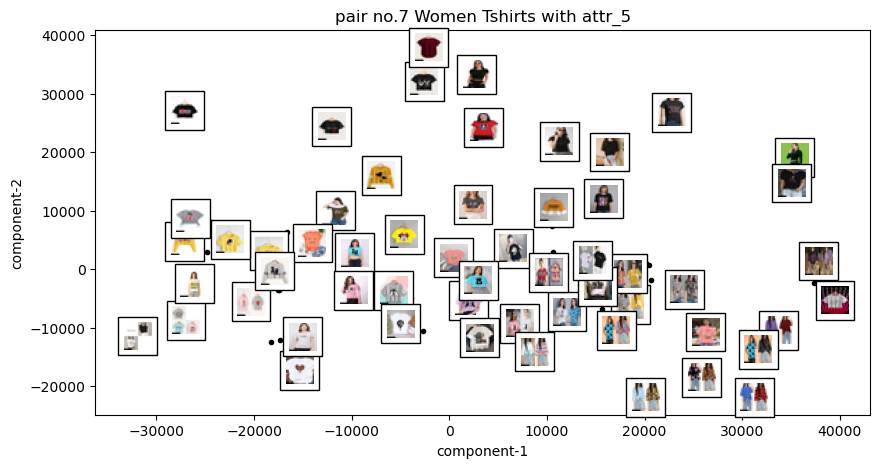

In [575]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Women Tops & Tunics" category with attr_6
#### 1.The component-1 seems to be the color og the background going from left to right
#### 2. The component-2 seems to be print of the tshirts in the images going from printed to solid color from bottom to top which can be observed in the plot

['printed' 'solid' 'default']


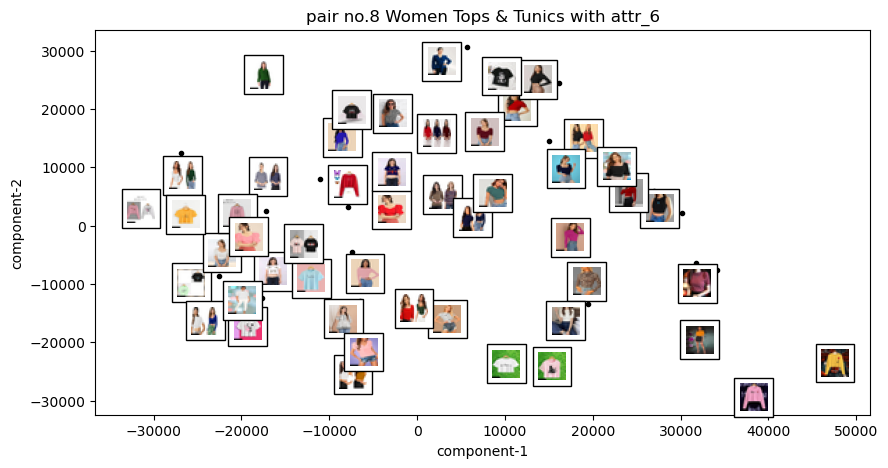

In [577]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

### For "Women Tops & Tunics" category with attr_7
#### 1. The component-1 seems to be the color of the background going from left to right
#### 2. No visible pattern can be oberved along component-2

['quirky' 'floral' 'typography' 'solid' 'default']


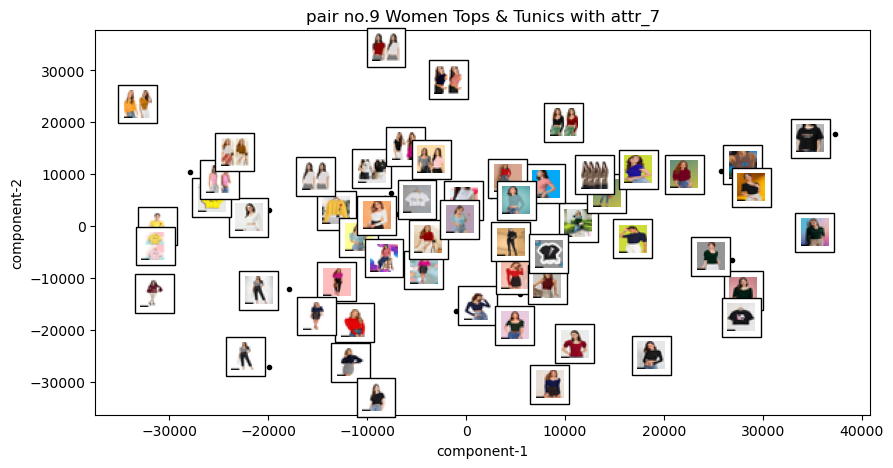

In [579]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='Isomap')
    i+=1

## 2. Identifying components of t-SNE

In [591]:
i=0

### For "Men T-shirts" category with attr_1
#### 1. The component-1 might be color of t-shirts in the images gradually going from darker colors to lighter colors from left to right which can be observed in the plot
#### 2.Here the component-2 might be having multiple colored tshirts images at the botto, to single colored tshirts at the top in general

['multicolor' 'default' 'black' 'white']


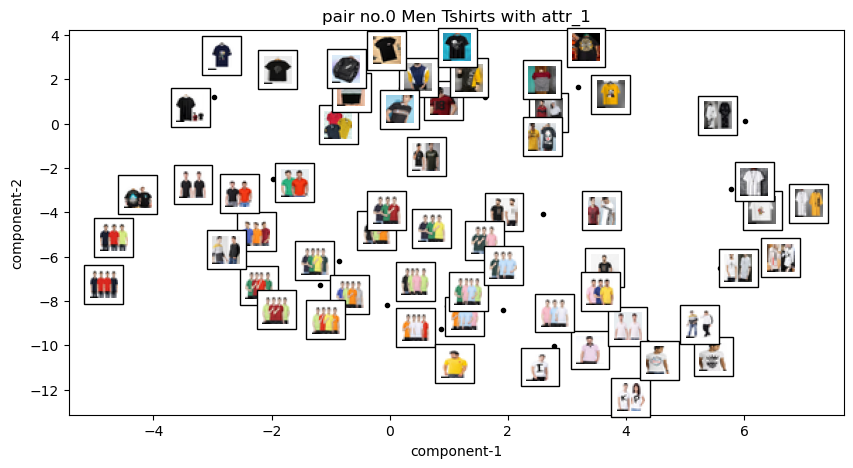

In [593]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Men T-shirts" category with attr_2
#### 1.Here the component-1 might be type of collar going from round neck on the left to polo on the right
#### 2. The component-2 might be color of t-shirts in the images gradually going from darker colors to lighter colors from bottom to top which can be observed in the plot

['polo' 'round']


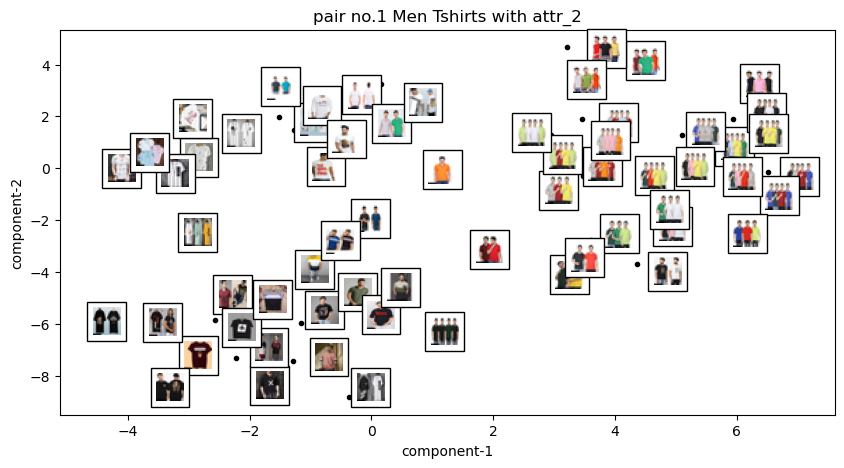

In [594]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Sarees" category with attr_4
#### 1.Here the component-1 might be color of the sarees going from light colors to darker colors from left to right.
#### 2. The component-2 might be background color going from whitish bacground at the bottom to darker background at the top

['multicolor' 'white' 'cream' 'default' 'pink' 'yellow' 'navy blue']


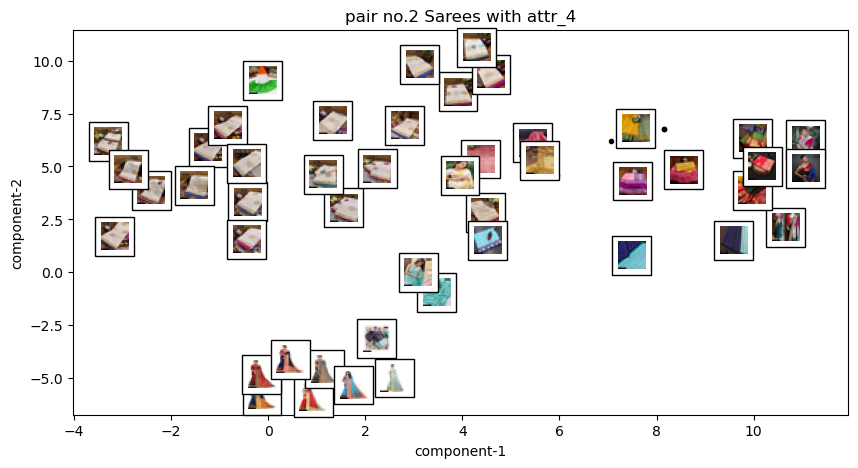

In [597]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Sarees" category with attr_10
#### 1.Here the component-1 might be presence of human where human is present in the left to human not present in the right.
#### 2. The component-2 might be the print texture with heavy print at the bottom to light print at the top

['no' 'yes']


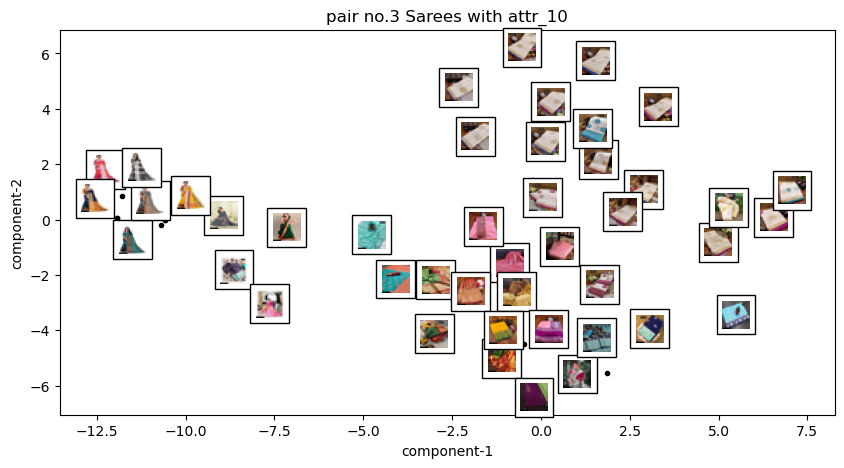

In [598]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Kurtis" category with attr_8
#### 1. The component-1 might be background color going from colorful background in the left to whitish background in the right
#### 2.No distinguishable pattern along component-2

['three-quarter sleeves' 'sleeveless' 'short sleeves']


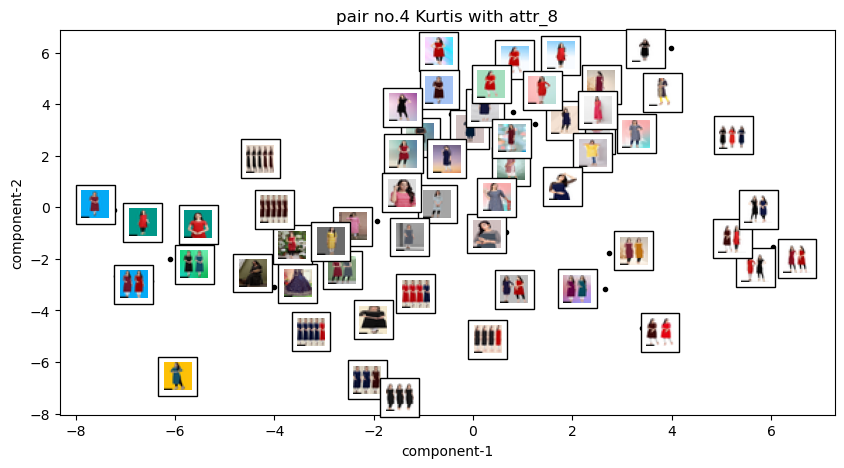

In [600]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Kurtis" category with attr_9
#### No distinguishable pattern along both component-1 and component-2

['regular' 'sleeveless']


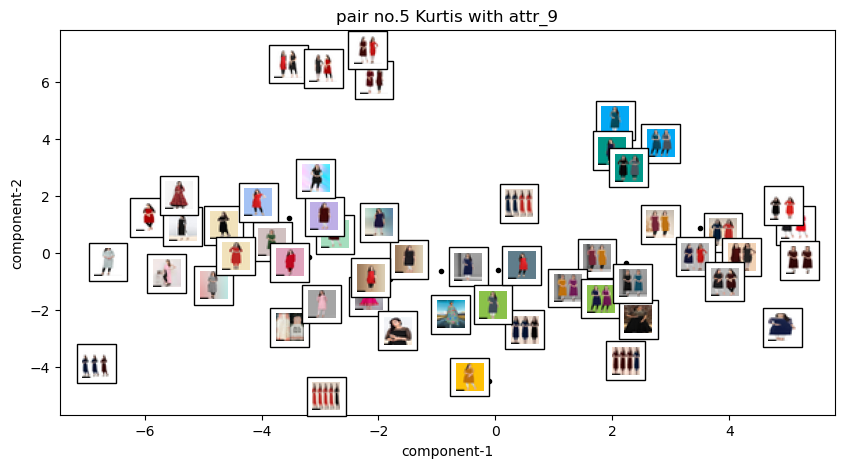

In [602]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Women Tshirts" category with attr_3
#### 1. The component-1 might be tshirt color going from whitish color to darker color from left to right
#### 2. Component-2 might be background color foing from darker background to lighter background from bottom to top in general with some exceptions

['regular' 'crop' 'long']


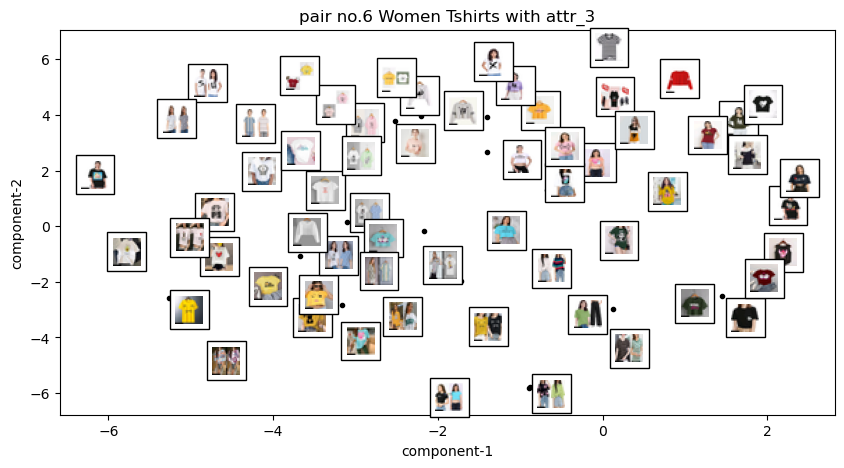

In [604]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Women Tshirts" category with attr_5
#### 1. The component-1 might be tshirt color going from whitish color to darker color from left to right
#### 2. No distinguishable pattern along component-2

['solid' 'graphic' 'quirky' 'typography' 'default' 'funky print']


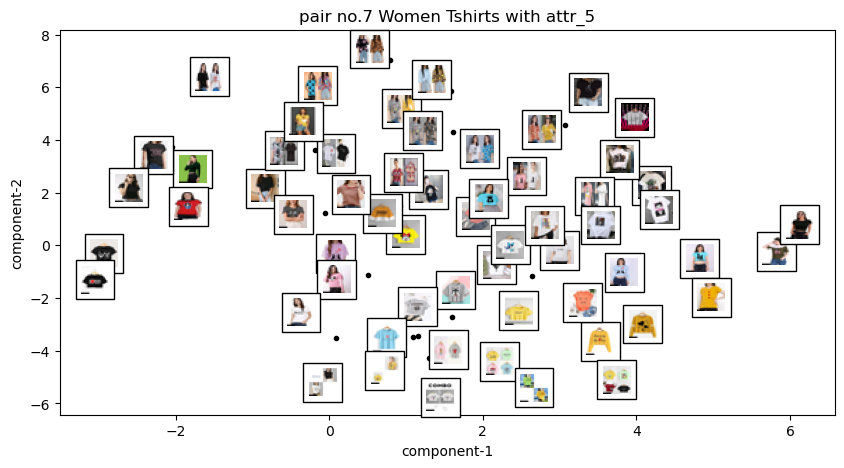

In [606]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Women Tops&Tunics" category with attr_6
#### 1. The component-1 might be tshirt print going from solid color to printed from left to right
#### 2. Component-2 might be background color foing from darker background to lighter background from bottom to top in general with some exceptions

['printed' 'solid' 'default']


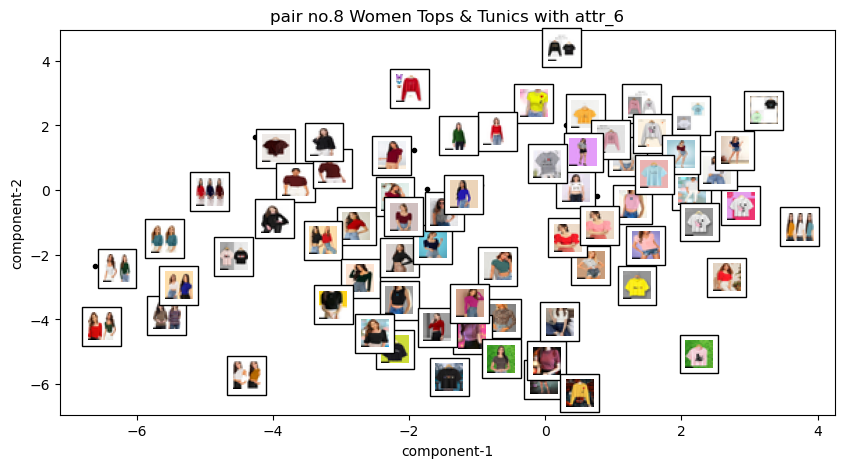

In [608]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

### For "Women Tops&Tunics" category with attr_7
#### 1. No indistinguishable pattern along component-1
#### 2. Component-2 might be background color foing from darker background to lighter background from bottom to top in general with some exceptions

['quirky' 'floral' 'typography' 'solid' 'default']


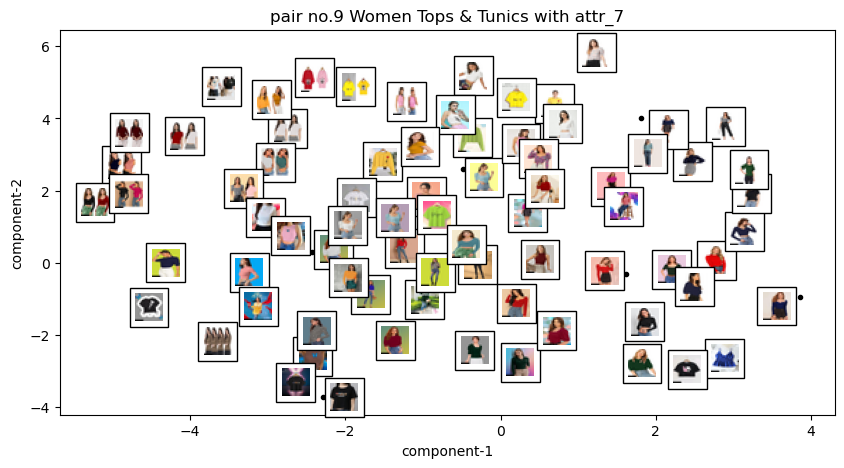

In [610]:
if i<10:
    print(df_list[i][tuple_pairs[i][1]].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("pair no."+str(i)+" "+tuple_pairs[i][0]+" with "+tuple_pairs[i][1])
    plt.xlabel('component-1')
    plt.ylabel('component-2')
    plot_components(final_flattened_list[i],images=final_img_list[i],
                    method='t-SNE')
    i+=1

## Conclusion:

### The main observation from the manifold learning transformations :

##### That both Isomap and t-SNE effectively capture underlying patterns related to color variations, styles, and attributes of clothing items.

##### The findings help in understanding how different attributes correlate within categories, providing insights into consumer preferences or design trends.

### The Isomap visualizations revealed some interesting patterns in the data:

##### For "Men T-shirts" with attribute 1 (background color) and attribute 2 (collar type), the components seemed to capture color and collar type variations respectively.
##### For "Sarees" with attribute 4 (orientation) and attribute 10 (human presence), the components reflected saree orientation and human presence/absence.
##### For "Kurtis" with attribute 8 (sleeve length) and attribute 9 (sleeve type), the components showed variations in sleeve characteristics.
##### For "Women T-shirts" with attribute 3 (length) and attribute 5 (print type), the components captured length and print variations.
##### For "Women Tops & Tunics" with attribute 6 (print) and attribute 7 (pattern), the components seemed to reflect print and background color differences.

### The t-SNE visualizations also uncovered some similar patterns, though the interpretations were sometimes slightly different, e.g., capturing color variations rather than just background/orientation.
